<a href="https://colab.research.google.com/github/NamHaiBui/2Meet/blob/main/FinalProject364HoaNam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout

from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [245]:
import io 
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

#Setting Seed for future reproduction

In [246]:
np.random.seed(1)

# Understanding the dataframes

In [247]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
X_features = train.drop(labels= ["label"],axis = 1)
Y_features = train["label"]
(X_train,X_test,Y_train,Y_test) = train_test_split(X_features,Y_features,test_size=0.3, random_state = 10)
print(Y_test.shape)

(12600,)


In [250]:
X_train = X_train.values.reshape(29400, 28, 28, 1) # Adding a color channel
X_test = X_test.values.reshape(12600, 28, 28, 1) # Adding a color channel
Y_train = Y_train.values
Y_test = Y_test.values

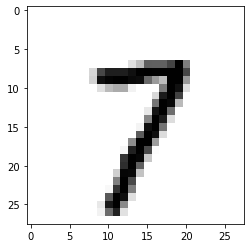

In [251]:
plt.imshow(X_test[0].reshape(28,28),cmap = plt.cm.binary)
plt.show()

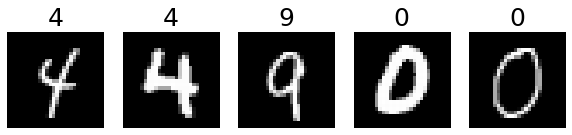

In [252]:
fig, axes = plt.subplots(1,5, figsize=(10,5))
axes = axes.flatten()
idx = np.random.randint(0,29400,size=5)
for i in range(5):
    axes[i].imshow(X_train[idx[i]].reshape(28,28), cmap="gray")
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(Y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

We apply gray scale normlization to avoid having too noises causing the machine to falsely predict the number

In [253]:
X_train = X_train / X_train.max() #255 
X_test = X_test / X_test.max()

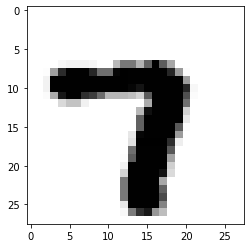

1.0


In [254]:
plt.imshow(X_train[0].reshape(28,28),cmap = plt.cm.binary)
plt.show()

print(X_train.max())

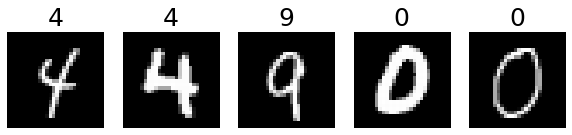

In [255]:
fig, axes = plt.subplots(1,5, figsize=(10,5))
axes = axes.flatten()
for i in range(5):
    axes[i].imshow(X_train[idx[i]].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(Y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [256]:
#One hot encoding
Y_cat_train = to_categorical(Y_train, 10) # short for y_categorical_train
Y_cat_test  = to_categorical(Y_test, 10)

# CNN Model

In [257]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# 2D to 1D
model.add(Flatten())

# Dense Layer
model.add(Dense(512,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [258]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                      

In [259]:
model.fit(X_train,Y_cat_train,epochs=5)

Epoch 1/5
919/919 [==============================] - 123s 133ms/step - loss: 0.2095 - accuracy: 0.9439
Epoch 2/5
919/919 [==============================] - 122s 133ms/step - loss: 0.1005 - accuracy: 0.9746
Epoch 3/5
919/919 [==============================] - 125s 136ms/step - loss: 0.0688 - accuracy: 0.9832
Epoch 4/5
919/919 [==============================] - 121s 132ms/step - loss: 0.0605 - accuracy: 0.9854
Epoch 5/5
919/919 [==============================] - 121s 132ms/step - loss: 0.0463 - accuracy: 0.9895


In [261]:
model.evaluate(X_test,Y_cat_test)

394/394 [==============================] - 10s 26ms/step - loss: 0.1133 - accuracy: 0.9833


[0.11334200203418732, 0.9833333492279053]

In [262]:
y_pred = np.argmax(model.predict(X_test.reshape(12600,28,28,1)), axis = -1)

394/394 [==============================] - 11s 29ms/step


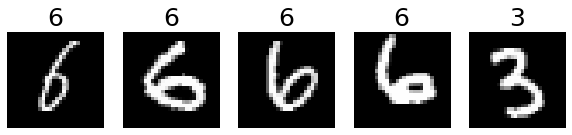

In [288]:
fig, axes = plt.subplots(1,5, figsize=(10,5))
axes = axes.flatten()
idx = np.random.randint(0,12600,size=5)
for i in range(5):
    axes[i].imshow(X_test[idx[i]].reshape(28,28), cmap="gray")
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_pred[idx[i]])), color= 'black', fontsize=25)
plt.show()# inspect the first number in the test dataset predicted by the model
